Імпорт необхідних бібліотек

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime
from scipy import stats

Завантаження датасету та його огляд

In [2]:
data = pd.read_csv(r"C:\Users\38063\Downloads\Test_task_Analyst_App.csv", sep=';')

In [3]:
data.head()

,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,16.03.2017 13:35,m,26.01.2017
1,3207526951,6,16.03.2017 9:09,m,26.01.2017
2,3207526951,6,16.03.2017 9:09,m,26.01.2017
3,3207526951,6,16.03.2017 12:13,m,26.01.2017
4,3207526951,6,15.03.2017 14:01,m,26.01.2017


In [4]:
data.query("gender ==' '")

,sender_id,platform_id,time_stamp,gender,reg_date
109619,3216008283,6,13.03.2017 14:25,,09.03.2017
109620,3216008283,6,13.03.2017 7:45,,09.03.2017
109621,3216008283,6,13.03.2017 7:45,,09.03.2017
109622,3216008283,6,15.03.2017 21:40,,09.03.2017
109623,3215997599,7,15.03.2017 12:54,,09.03.2017
...,...,...,...,...,...
703531,3215997599,7,26.03.2017 22:19,,09.03.2017
703532,3215997599,7,26.03.2017 22:19,,09.03.2017
703533,3215997599,7,26.03.2017 22:19,,09.03.2017
703534,3215997599,7,26.03.2017 22:19,,09.03.2017


In [5]:
data.dtypes

sender_id       int64
platform_id     int64
time_stamp     object
gender         object
reg_date       object
dtype: object

In [6]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%d.%m.%Y %H:%M')
data['reg_date'] = pd.to_datetime(data['reg_date'], format='%d.%m.%Y')
data['gender'] = data['gender'].replace(' ', 'Unknown')

In [7]:
data.dtypes

sender_id               int64
platform_id             int64
time_stamp     datetime64[ns]
gender                 object
reg_date       datetime64[ns]
dtype: object

In [8]:
df = data.groupby('sender_id') \
.aggregate({'time_stamp':'min'}) \
.reset_index() \
.rename(columns={'time_stamp':'min_time_stamp'})

In [9]:
df.head()

,sender_id,min_time_stamp
0,3201943713,2017-03-14 23:33:00
1,3201946084,2017-03-13 01:16:00
2,3201948046,2017-03-15 01:41:00
3,3201948762,2017-03-13 14:21:00
4,3201948891,2017-03-13 01:12:00


In [10]:
comparison_date = pd.to_datetime('24.03.2017 16:00', format='%d.%m.%Y %H:%M')
filtered_sender_ids = df[df['min_time_stamp'] > comparison_date]['sender_id']
filtered_sender_ids = filtered_sender_ids.to_list()

In [11]:
data = data[data['sender_id'].isin(filtered_sender_ids)]

In [12]:
data.head()

,sender_id,platform_id,time_stamp,gender,reg_date
150162,3218635027,7,2017-03-26 06:19:00,m,2017-03-23
150163,3218635027,7,2017-03-26 06:19:00,m,2017-03-23
150164,3218635027,7,2017-03-26 06:18:00,m,2017-03-23
150165,3218635027,7,2017-03-26 06:19:00,m,2017-03-23
150166,3218635027,7,2017-03-26 06:19:00,m,2017-03-23


In [13]:
def group_number(id):
    if(id%2==0):
        return 'control'
    elif(id%2==1):
        return 'alternative'

In [14]:
data['group'] = data['sender_id'].apply(group_number)

In [15]:
data.head()

,sender_id,platform_id,time_stamp,gender,reg_date,group
150162,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,alternative
150163,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,alternative
150164,3218635027,7,2017-03-26 06:18:00,m,2017-03-23,alternative
150165,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,alternative
150166,3218635027,7,2017-03-26 06:19:00,m,2017-03-23,alternative


Розподіляємо нашу вибірку на дві групи: контрольну та альтернативну за нашим критерієм та будемо досліджувати на скільки якісне розбиття ми маємо

In [16]:
dataA = data.query("group=='control'")
dataB = data.query("group=='alternative'")
dataA = dataA.groupby('sender_id').agg({'time_stamp': 'count', 'gender': 'first','reg_date':'first','platform_id':'first'}) \
.rename(columns={'time_stamp':'count'}).reset_index()
dataB = dataB.groupby('sender_id').agg({'time_stamp': 'count', 'gender': 'first','reg_date':'first','platform_id':'first'}) \
.rename(columns={'time_stamp':'count'}).reset_index()

In [17]:
dataA.head()

,sender_id,count,gender,reg_date,platform_id
0,3201991474,16,m,2017-01-01,7
1,3202020878,31,m,2017-01-01,7
2,3202032484,1,m,2017-01-01,6
3,3202037588,2,m,2017-01-01,6
4,3202100794,1,m,2017-01-01,7


In [18]:
dataB.head()

,sender_id,count,gender,reg_date,platform_id
0,3202002503,1,m,2017-01-01,7
1,3202048369,1,m,2017-01-01,7
2,3202056467,1,m,2017-01-01,6
3,3202122785,31,m,2017-01-01,7
4,3202138521,21,m,2017-01-01,7


Text(0.5, 1.0, 'Розподіл користувачів за статтю в контрольній групі')

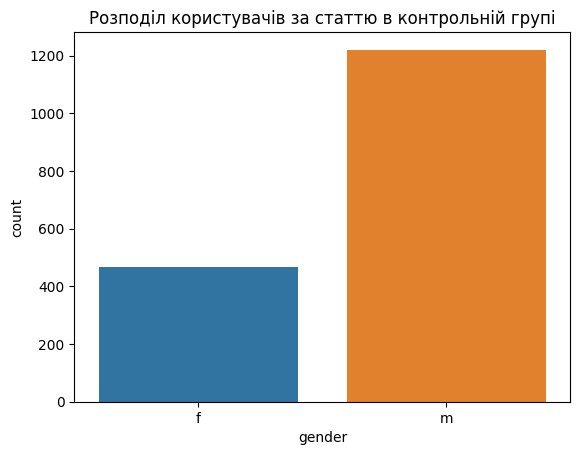

In [19]:
sns.barplot(data= dataA.groupby('gender').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'})
            ,x='gender',y='count')
plt.title('Розподіл користувачів за статтю в контрольній групі')

Text(0.5, 1.0, 'Розподіл користувачів за статтю в альтернативній групі')

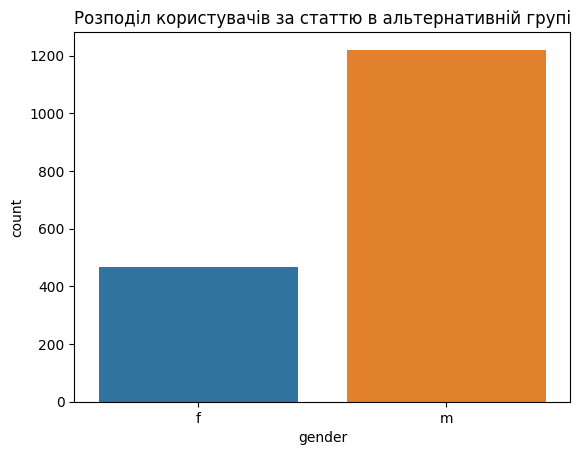

In [20]:
sns.barplot(data= dataA.groupby('gender').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'})
            ,x='gender',y='count')
plt.title('Розподіл користувачів за статтю в альтернативній групі')

In [20]:
#Контрольна група
dataA.groupby('gender').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'})

,gender,count
0,f,467
1,m,1221


In [21]:
#Альтернативна група
dataB.groupby('gender').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'})

,gender,count
0,f,430
1,m,1175


Звідси видно що розподіл чоловіків і жінок у обох групах є однаковим 

Text(0.5, 1.0, 'Розподіл користувачів за платформами в контрольній групі')

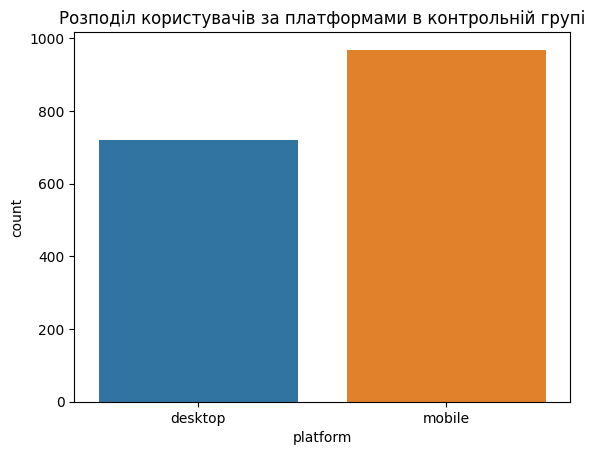

In [22]:
sns.barplot(data= dataA.groupby('platform_id').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count','platform_id':'platform'}).replace({6:'desktop',7:'mobile'})
            ,x='platform',y='count')
plt.title('Розподіл користувачів за платформами в контрольній групі')

Text(0.5, 1.0, 'Розподіл користувачів за платформами в альтернативній групі')

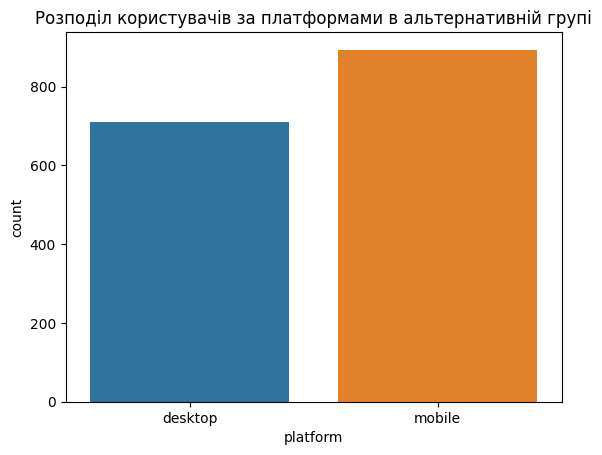

In [23]:
sns.barplot(data= dataB.groupby('platform_id').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count','platform_id':'platform'}).replace({6:'desktop',7:'mobile'})
            ,x='platform',y='count')
plt.title('Розподіл користувачів за платформами в альтернативній групі')

In [24]:
#Контрольна група
dataA.groupby('platform_id').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count','platform_id':'platform'}) \
.replace({6:'desktop',7:'mobile'})

,platform,count
0,desktop,720
1,mobile,968


In [25]:
#Альтернативна група
dataB.groupby('platform_id').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'}) \
.replace({6:'desktop',7:'mobile'})

,platform_id,count
0,desktop,711
1,mobile,894


Аналогічно бачимо однаковість розподілів за платформами в обох групах

In [26]:
def create_barplot(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='reg_date', y='count', data=data)
    
    # Удаление подписей дат на оси X
    ax.set_xticklabels([])
    
    plt.show()

Розподіл користувачів за датами реєстрацій в контрольній групі

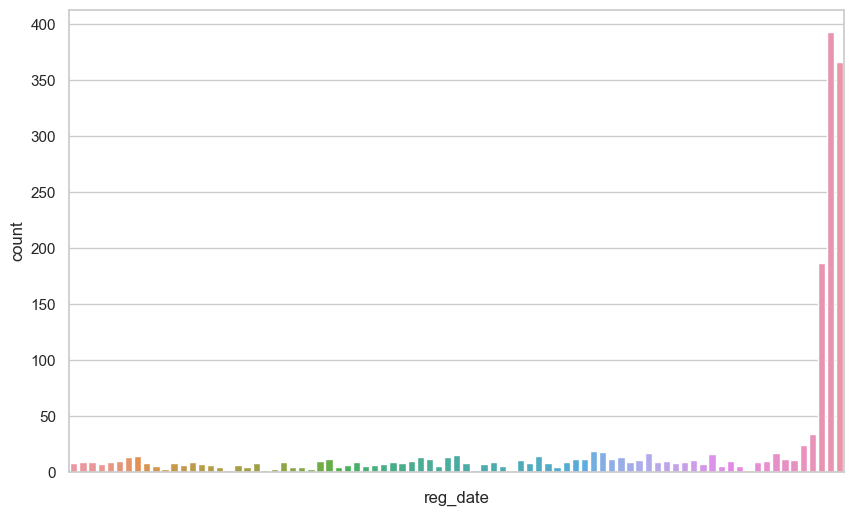

In [27]:
create_barplot(dataA.groupby('reg_date').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'}))

Розподіл користувачів за датами реєстрацій в альтернативній групі

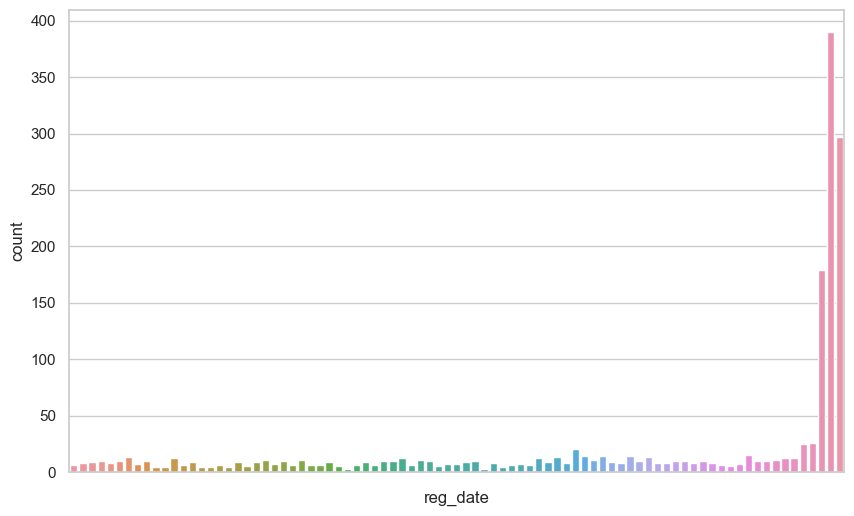

In [28]:
create_barplot(dataB.groupby('reg_date').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count'}))

Так само бачимо що дати реєстрації людей з двох ріних груп мають однаковий розподіл, отже на підставі трьох попередніх досліджень робимо висновок що трафік був розбитий якісно 

In [29]:
print("Середня кількість виставлених оцінок(пройдених сторінок) у контрольній групі : ",dataA['count'].mean())
print("Середня кількість виставлених оцінок(пройдених сторінок) у альтернативній групі : ",dataB['count'].mean())

Середня кількість виставлених оцінок(пройдених сторінок) у контрольній групі :  11.225710900473933
Середня кількість виставлених оцінок(пройдених сторінок) у альтернативній групі :  10.368847352024922


In [30]:
t_statistic, p_value = stats.ttest_ind(dataA['count'], dataB['count'])

In [31]:
print('p_value =', p_value)

p_value = 0.26820033104191565


Найчастіше alpha покладається за 0.05,рідше за 0.1, але в будь-якому випадку наше p-value буде більше за alpha тобто ми не маємо причин відхилити нульову гіпотезу.
Таким чином на основі аналізу було прийняте рішення, залишити старий інтерфейс!

In [32]:
def create_barplot2(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='count', y='count_of_users', data=data)
    
    # Удаление подписей дат на оси X
    ax.set_xticklabels([])
    
    plt.show()

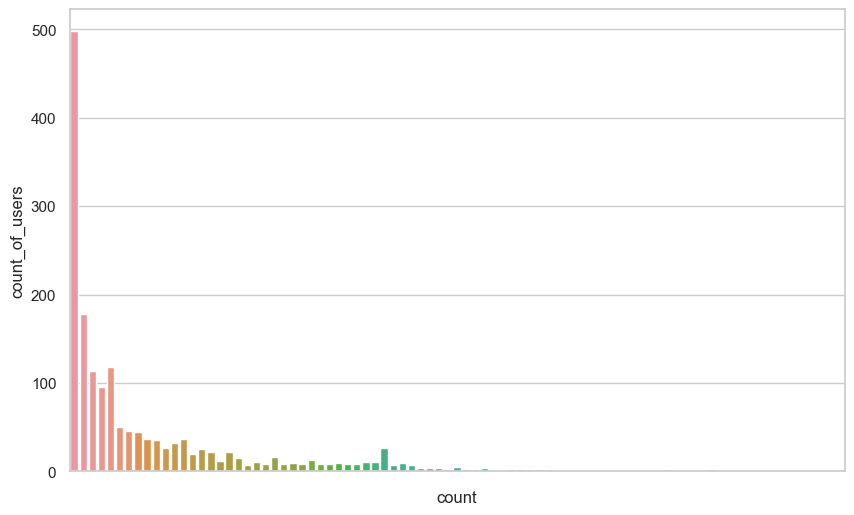

In [33]:
create_barplot2(dataA.groupby('count').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count_of_users'}))

Активність користувачів у контрольній групі

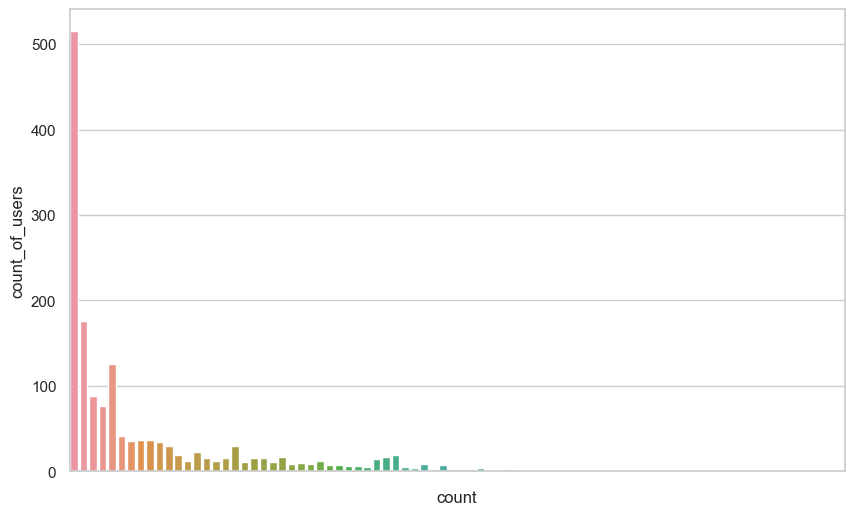

In [34]:
create_barplot2(dataB.groupby('count').aggregate({'sender_id':'count'}).reset_index().rename(columns={'sender_id':'count_of_users'}))

Активність користувачів у альтернативній групі